In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('airline cost new.csv')


In [7]:
df

,num_pass,cost
0,61,4280
1,63,4080
2,67,4420
3,69,4170
4,70,4480
5,74,4300
6,76,4820
7,81,4700
8,86,5110
9,91,5130


In [4]:
y = df['cost']
x = df['num_pass']

In [1]:
import statsmodels.api as sm


In [5]:
xc = sm.add_constant(x)

C:\Users\Loki\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [6]:
model = sm.OLS(y,xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     302.2
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           4.23e-22
Time:                        11:28:07   Log-Likelihood:                -323.87
No. Observations:                  49   AIC:                             651.7
Df Residuals:                      47   BIC:                             655.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1612.9763    185.831      8.680      0.000    1239.133    1986.820
num_pass      39.8941      2.295     17.383      0.000      35.277      44.511
==============================================================================
Omnibus:                        3.612   Durbin-Watson:                   2.624
Prob(Omnibus):                  0.164   Jarque-Bera (JB):                2.700
Skew:                           0.556   Prob(JB):                        0.259
Kurtosis:                       3.296   Cond. No.                         574.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

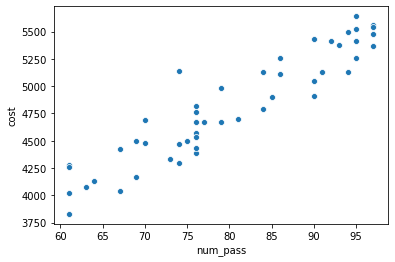

In [9]:
sns.scatterplot(x = x, y = y)


Estimated model is: 

cost = 1612 + 39.89*num_pass

1612 is the cost incurred by the airline even when no passenger is flying (fixed cost). 39.89 is the cost per passenger or increase in cost with addition of one passenger ( variable cost).

R-Squared:
   86.5 percent of variation in cost is explained by num_pass (model).

num_pass coefficient:

H0 : b_num_pass = 0

H1 : b_num_pass != 0
   
   0.000 (p > |t|) is the probability of getting |b_num_pass| >= 39.89 when H0 is true. In other words, there's no chance that we get a value of 39.89 when H0 is true. Hence we will conclude that H0 is not true and accept alternate hypothesis.

#### Estimating Coefficients using basic equations

In [11]:
x_mean = np.mean(x)
y_mean = np.mean(y)
n = len(x)

In [12]:
numerator = 0
denominator = 0

for i in range(n):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2

b1 = numerator/denominator
b0 = y_mean - (b1 * x_mean)

print('b0:', b0, 'b1:', b1)


b0: 1612.9763145277288 b1: 39.89413456928241
